In [1]:
import pandas as pd
import numpy as np 
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_json('players_stats.json')
df = pd.DataFrame(data)
dataset = df.copy()
dataset.head(10)

,total_goals_in_clubs,total_assists,total_own_goal,total_yellow_card,total_second_yellow_card,total_red_card,total_penalty,total_goal_conceded,total_clean_sheets,height,pos
0,5,5,0,3,0,0,3,0,0,173,MID
1,0,1,0,0,0,1,0,0,0,184,DEF
2,0,1,0,4,1,0,0,0,0,187,DEF
3,2,1,0,0,0,0,0,0,0,180,MID
4,17,2,0,2,0,0,0,0,0,182,ATT
5,0,0,0,7,1,0,0,0,0,180,DEF
6,1,0,1,6,0,0,0,0,0,180,DEF
7,1,1,0,4,0,1,0,0,0,179,MID
8,2,0,0,2,0,0,0,0,0,180,MID
9,1,3,1,11,0,0,0,0,0,168,DEF


In [3]:
dataset.describe()

,total_goals_in_clubs,total_assists,total_own_goal,total_yellow_card,total_second_yellow_card,total_red_card,total_penalty,total_goal_conceded,total_clean_sheets,height
count,9141.000000,9141.000000,9141.000000,9141.000000,9141.000000,9141.000000,9141.000000,9141.000000,9141.000000,9141.000000
mean,28.813587,18.566678,0.559239,34.100536,0.996171,1.077125,2.479269,28.027896,7.117055,182.427524
std,42.182391,23.890594,1.066558,29.315063,1.494441,1.428478,5.924076,99.628206,26.977847,6.543669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159.000000
25%,4.000000,3.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,178.000000
50%,14.000000,11.000000,0.000000,26.000000,0.000000,1.000000,0.000000,0.000000,0.000000,183.000000
75%,36.000000,26.000000,1.000000,48.000000,1.000000,2.000000,2.000000,0.000000,0.000000,187.000000
max,715.000000,339.000000,11.000000,232.000000,19.000000,14.000000,134.000000,959.000000,428.000000,206.000000


In [4]:
# total rows and colums in the dataset
dataset.shape

(9141, 11)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9141 entries, 0 to 9140
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   total_goals_in_clubs      9141 non-null   int64 
 1   total_assists             9141 non-null   int64 
 2   total_own_goal            9141 non-null   int64 
 3   total_yellow_card         9141 non-null   int64 
 4   total_second_yellow_card  9141 non-null   int64 
 5   total_red_card            9141 non-null   int64 
 6   total_penalty             9141 non-null   int64 
 7   total_goal_conceded       9141 non-null   int64 
 8   total_clean_sheets        9141 non-null   int64 
 9   height                    9141 non-null   int64 
 10  pos                       9141 non-null   object
dtypes: int64(10), object(1)
memory usage: 785.7+ KB


In [6]:
dataset.columns

Index(['total_goals_in_clubs', 'total_assists', 'total_own_goal',
       'total_yellow_card', 'total_second_yellow_card', 'total_red_card',
       'total_penalty', 'total_goal_conceded', 'total_clean_sheets', 'height',
       'pos'],
      dtype='object')

In [7]:
ss = StandardScaler()
dataset_label = pd.get_dummies(dataset.pos).astype(int)
dataset_data = ss.fit_transform(dataset.drop(columns=['pos']))
dataset_data

array([[-0.56456947, -0.56789798, -0.52436823, ..., -0.2813403 ,
        -0.26382551, -1.44078794],
       [-0.68310882, -0.73533705, -0.52436823, ..., -0.2813403 ,
        -0.26382551,  0.24031802],
       [-0.68310882, -0.73533705, -0.52436823, ..., -0.2813403 ,
        -0.26382551,  0.69880146],
       ...,
       [-0.68310882, -0.77719682, -0.52436823, ...,  3.84422313,
         3.22070538,  1.76859617],
       [-0.68310882, -0.77719682,  1.35092519, ...,  6.16297046,
         6.18626359,  1.15728491],
       [ 5.43352205,  4.83201209,  0.41327848, ..., -0.2813403 ,
        -0.26382551,  0.24031802]])

In [8]:
dataset_label

,ATT,DEF,GK,MID
0,0,0,0,1
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
9136,1,0,0,0
9137,0,0,0,1
9138,0,0,1,0
9139,0,0,1,0


In [9]:
dataset_data = pd.DataFrame(dataset_data,columns=['total_goals_in_clubs', 'total_assists', 'total_own_goal',
       'total_yellow_card', 'total_second_yellow_card', 'total_red_card',
       'total_penalty', 'total_goal_conceded', 'total_clean_sheets', 'height'])
dataset_data = pd.concat([dataset_data,dataset_label],axis=1)

In [10]:
dataset_data

,total_goals_in_clubs,total_assists,total_own_goal,total_yellow_card,total_second_yellow_card,total_red_card,total_penalty,total_goal_conceded,total_clean_sheets,height,ATT,DEF,GK,MID
0,-0.564569,-0.567898,-0.524368,-1.060964,-0.666621,-0.754078,0.087906,-0.281340,-0.263826,-1.440788,0,0,0,1
1,-0.683109,-0.735337,-0.524368,-1.163306,-0.666621,-0.053994,-0.418530,-0.281340,-0.263826,0.240318,0,1,0,0
2,-0.683109,-0.735337,-0.524368,-1.026850,0.002562,-0.754078,-0.418530,-0.281340,-0.263826,0.698801,0,1,0,0
3,-0.635693,-0.735337,-0.524368,-1.163306,-0.666621,-0.754078,-0.418530,-0.281340,-0.263826,-0.370993,0,0,0,1
4,-0.280075,-0.693477,-0.524368,-1.095078,-0.666621,-0.754078,-0.418530,-0.281340,-0.263826,-0.065338,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9136,4.153297,1.566950,-0.524368,-0.174000,-0.666621,-0.754078,-0.249718,-0.281340,-0.263826,1.615768,1,0,0,0
9137,0.857903,2.613444,-0.524368,1.088219,1.340928,-0.754078,0.256718,-0.281340,-0.263826,-0.523821,0,0,0,1
9138,-0.683109,-0.777197,-0.524368,-0.924508,-0.666621,-0.053994,-0.418530,3.844223,3.220705,1.768596,0,0,1,0
9139,-0.683109,-0.777197,1.350925,0.098912,-0.666621,2.046258,-0.418530,6.162970,6.186264,1.157285,0,0,1,0


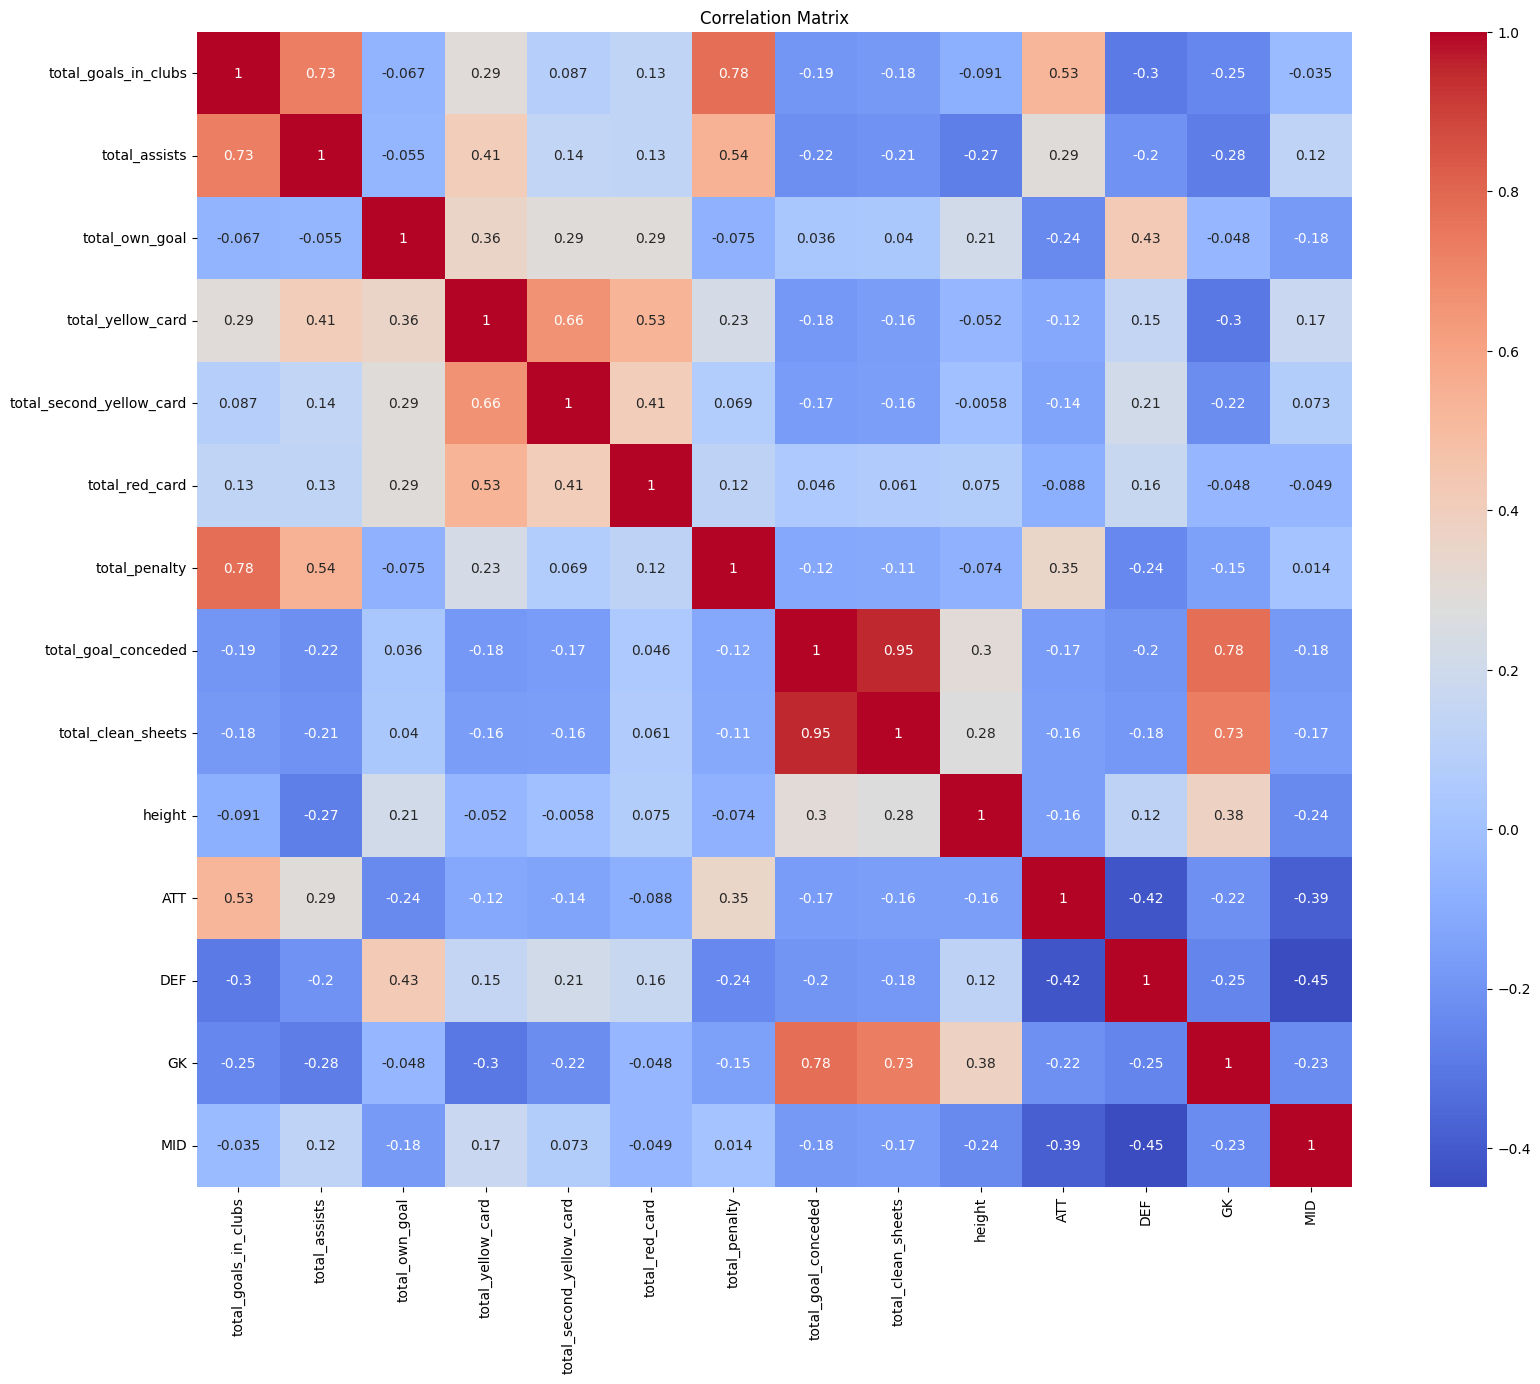

In [11]:
correlation_matrix = dataset_data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Text(0.5, 1.0, 'height')

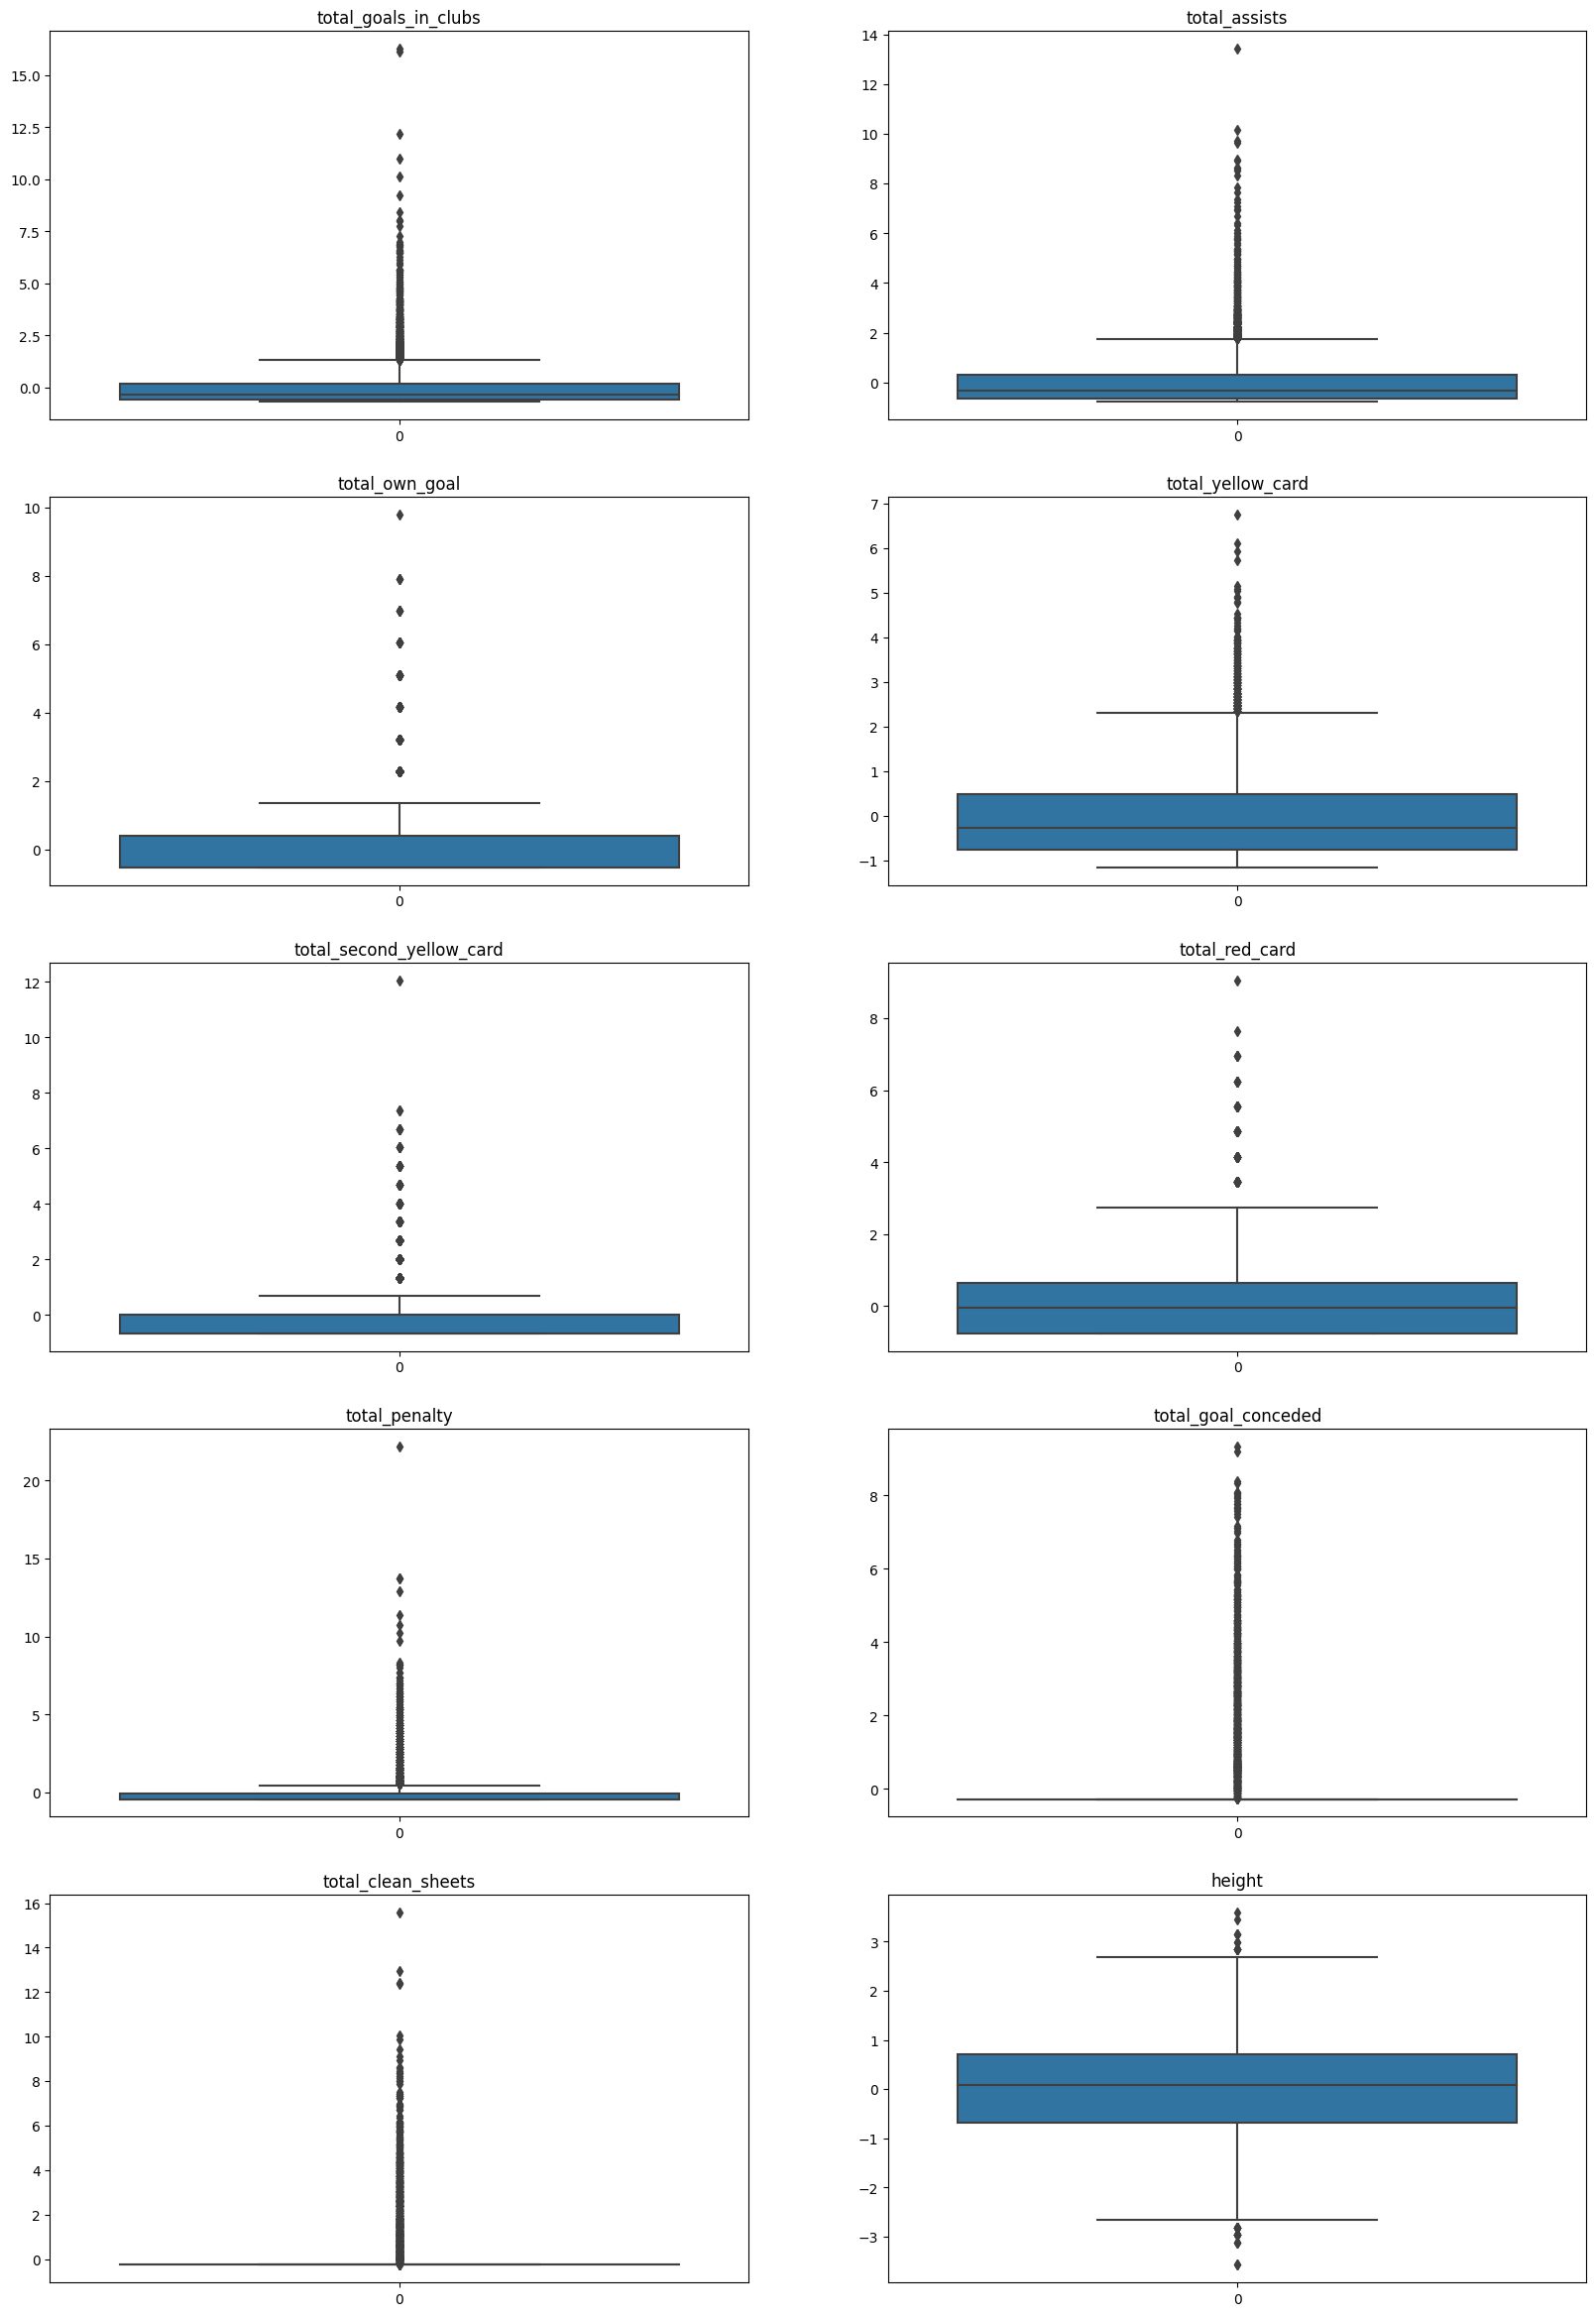

In [12]:
plt.figure(figsize=(20,60))
plt.subplot(10,2,1)
sns.boxplot(dataset_data['total_goals_in_clubs'])
plt.title('total_goals_in_clubs')
plt.subplot(10,2,2)
sns.boxplot(dataset_data['total_assists'])
plt.title('total_assists')
plt.subplot(10,2,3)
sns.boxplot(dataset_data['total_own_goal'])
plt.title('total_own_goal')
plt.subplot(10,2,4)
sns.boxplot(dataset_data['total_yellow_card'])
plt.title('total_yellow_card')
plt.subplot(10,2,5)
sns.boxplot(dataset_data['total_second_yellow_card'])
plt.title('total_second_yellow_card')
plt.subplot(10,2,6)
sns.boxplot(dataset_data['total_red_card'])
plt.title('total_red_card')
plt.subplot(10,2,7)
sns.boxplot(dataset_data['total_penalty'])
plt.title('total_penalty')
plt.subplot(10,2,8)
sns.boxplot(dataset_data['total_goal_conceded'])
plt.title('total_goal_conceded')
plt.subplot(10,2,9)
sns.boxplot(dataset_data['total_clean_sheets'])
plt.title('total_clean_sheets')
plt.subplot(10,2,10)
sns.boxplot(dataset_data['height'])
plt.title('height')

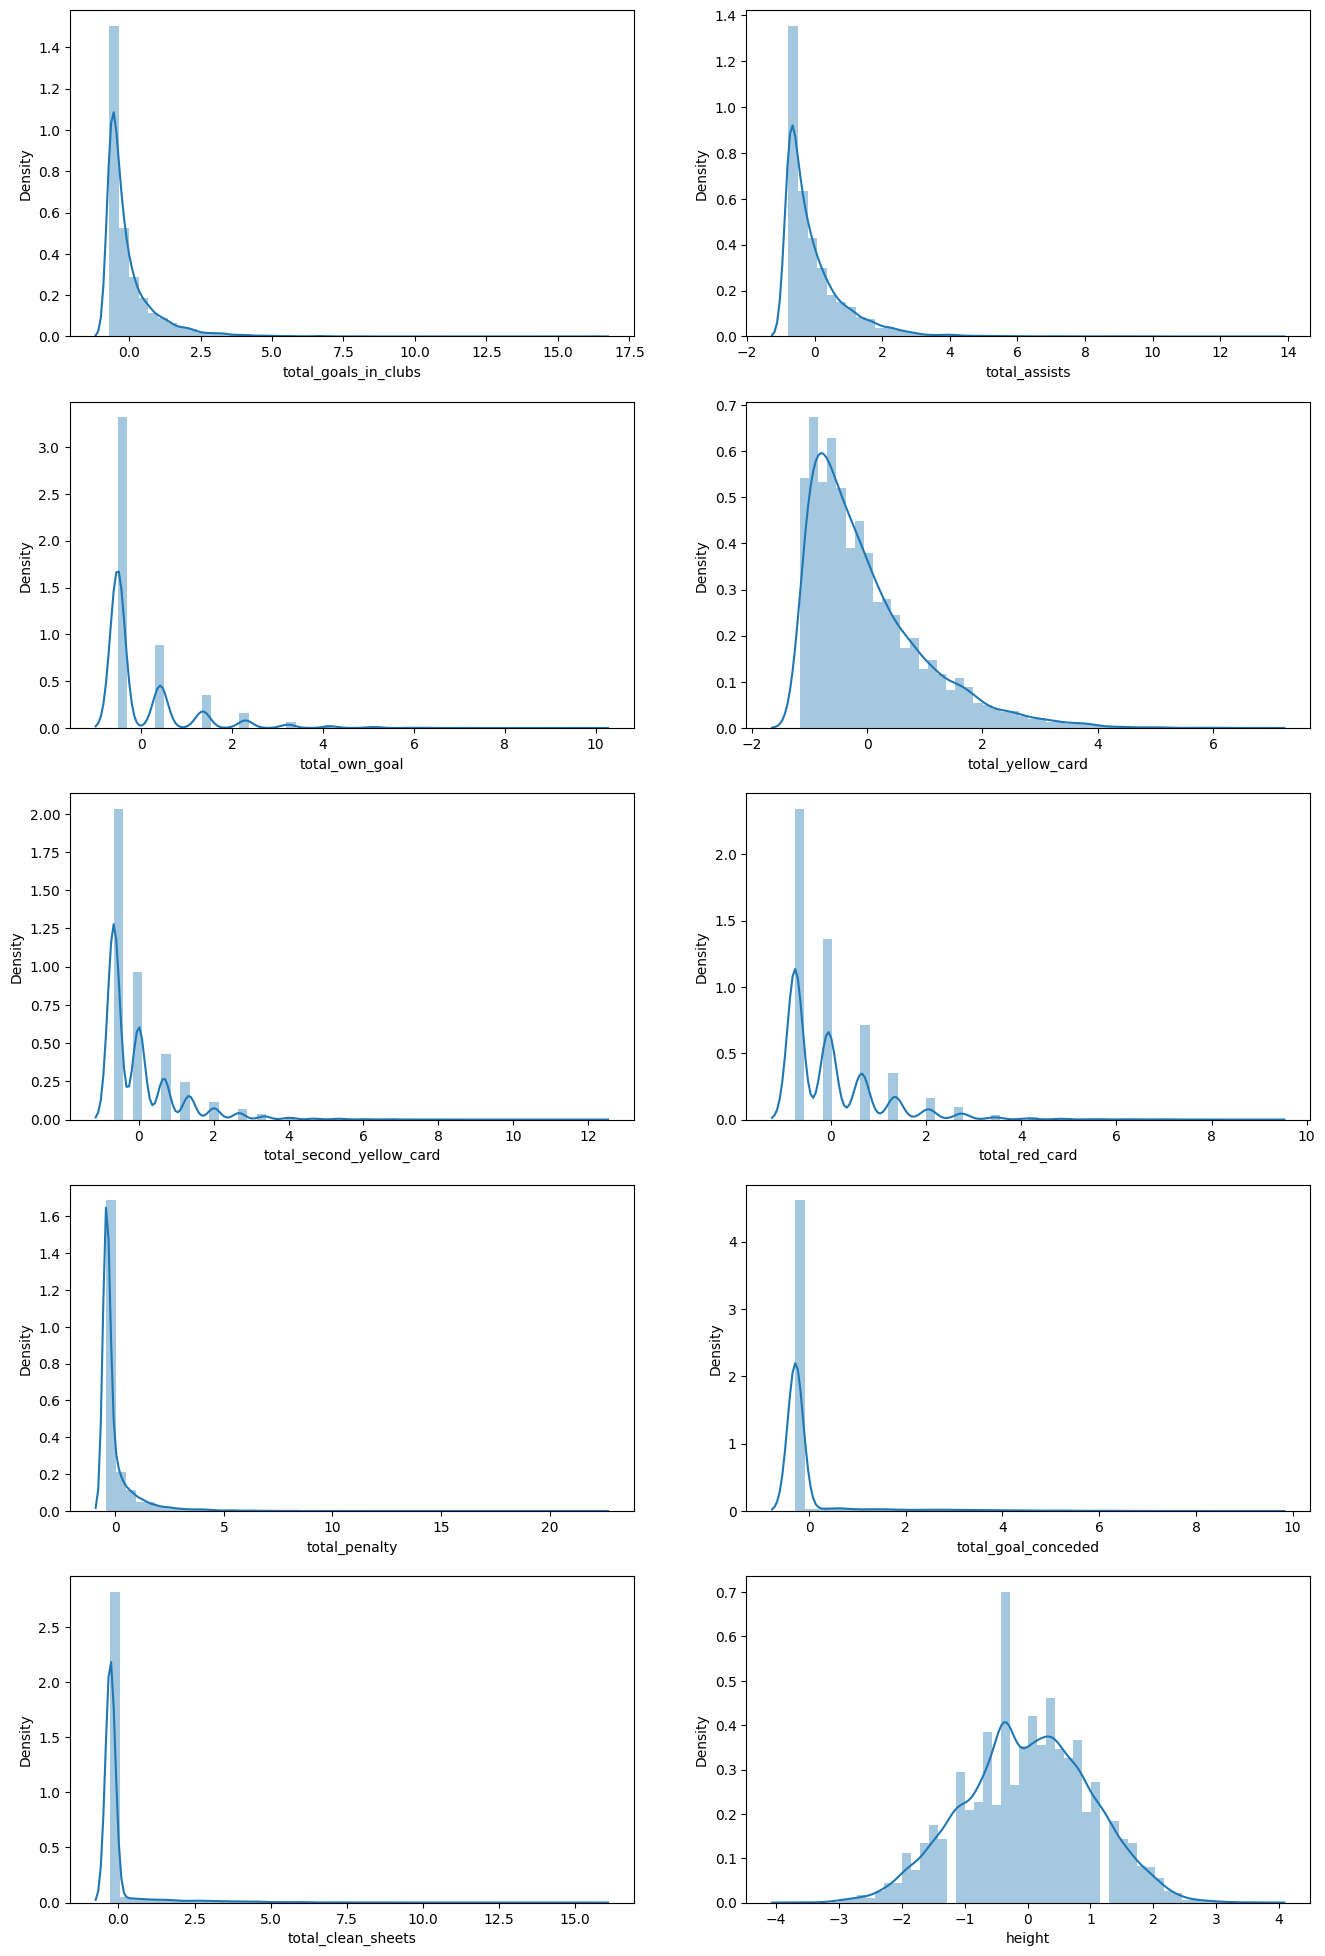

In [13]:
#'total_goals_in_clubs', 'total_assists', 'total_own_goal',
#        'total_yellow_card', 'total_second_yellow_card', 'total_red_card',
#        'total_penalty', 'total_goal_conceded', 'total_clean_sheets', 'height',
#
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,50))
plt.subplot(10,2,1)
sns.distplot(dataset_data['total_goals_in_clubs'],kde=True)
plt.subplot(10,2,2)
sns.distplot(dataset_data['total_assists'],kde=True)
plt.subplot(10,2,3)
sns.distplot(dataset_data['total_own_goal'],kde=True)
plt.subplot(10,2,4)
sns.distplot(dataset_data['total_yellow_card'],kde=True)
plt.subplot(10,2,5)
sns.distplot(dataset_data['total_second_yellow_card'],kde=True)
plt.subplot(10,2,6)
sns.distplot(dataset_data['total_red_card'],kde=True)
plt.subplot(10,2,7)
sns.distplot(dataset_data['total_penalty'],kde=True)
plt.subplot(10,2,8)
sns.distplot(dataset_data['total_goal_conceded'],kde=True)
plt.subplot(10,2,9)
sns.distplot(dataset_data['total_clean_sheets'],kde=True)
plt.subplot(10,2,10)
sns.distplot(dataset_data['height'],kde=True)
plt.show()

In [14]:
dataset_data.columns

Index(['total_goals_in_clubs', 'total_assists', 'total_own_goal',
       'total_yellow_card', 'total_second_yellow_card', 'total_red_card',
       'total_penalty', 'total_goal_conceded', 'total_clean_sheets', 'height',
       'ATT', 'DEF', 'GK', 'MID'],
      dtype='object')

In [15]:
dataset_data = dataset_data.drop(columns=['total_second_yellow_card',
                                          'total_penalty','total_clean_sheets'])

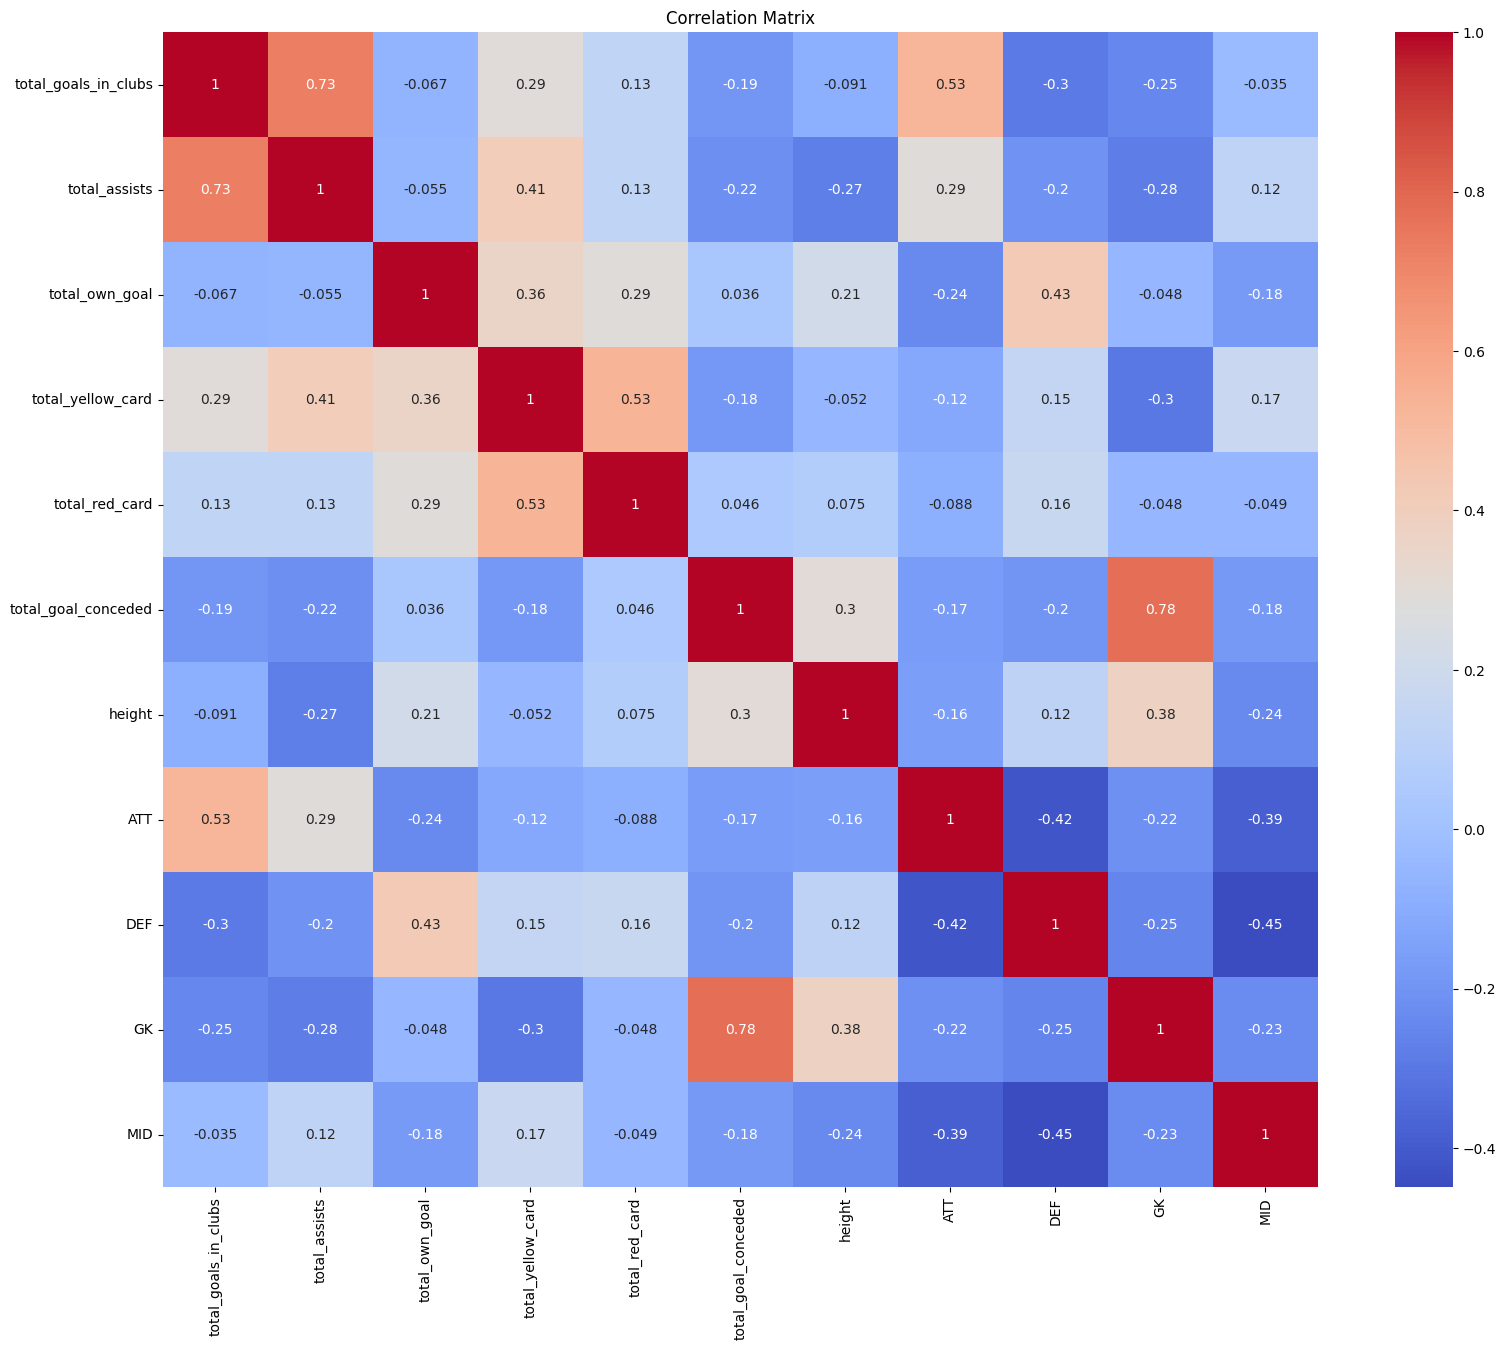

In [16]:
correlation_matrix = dataset_data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [17]:
dataset_data.columns

Index(['total_goals_in_clubs', 'total_assists', 'total_own_goal',
       'total_yellow_card', 'total_red_card', 'total_goal_conceded', 'height',
       'ATT', 'DEF', 'GK', 'MID'],
      dtype='object')

Text(0.5, 1.0, 'height')

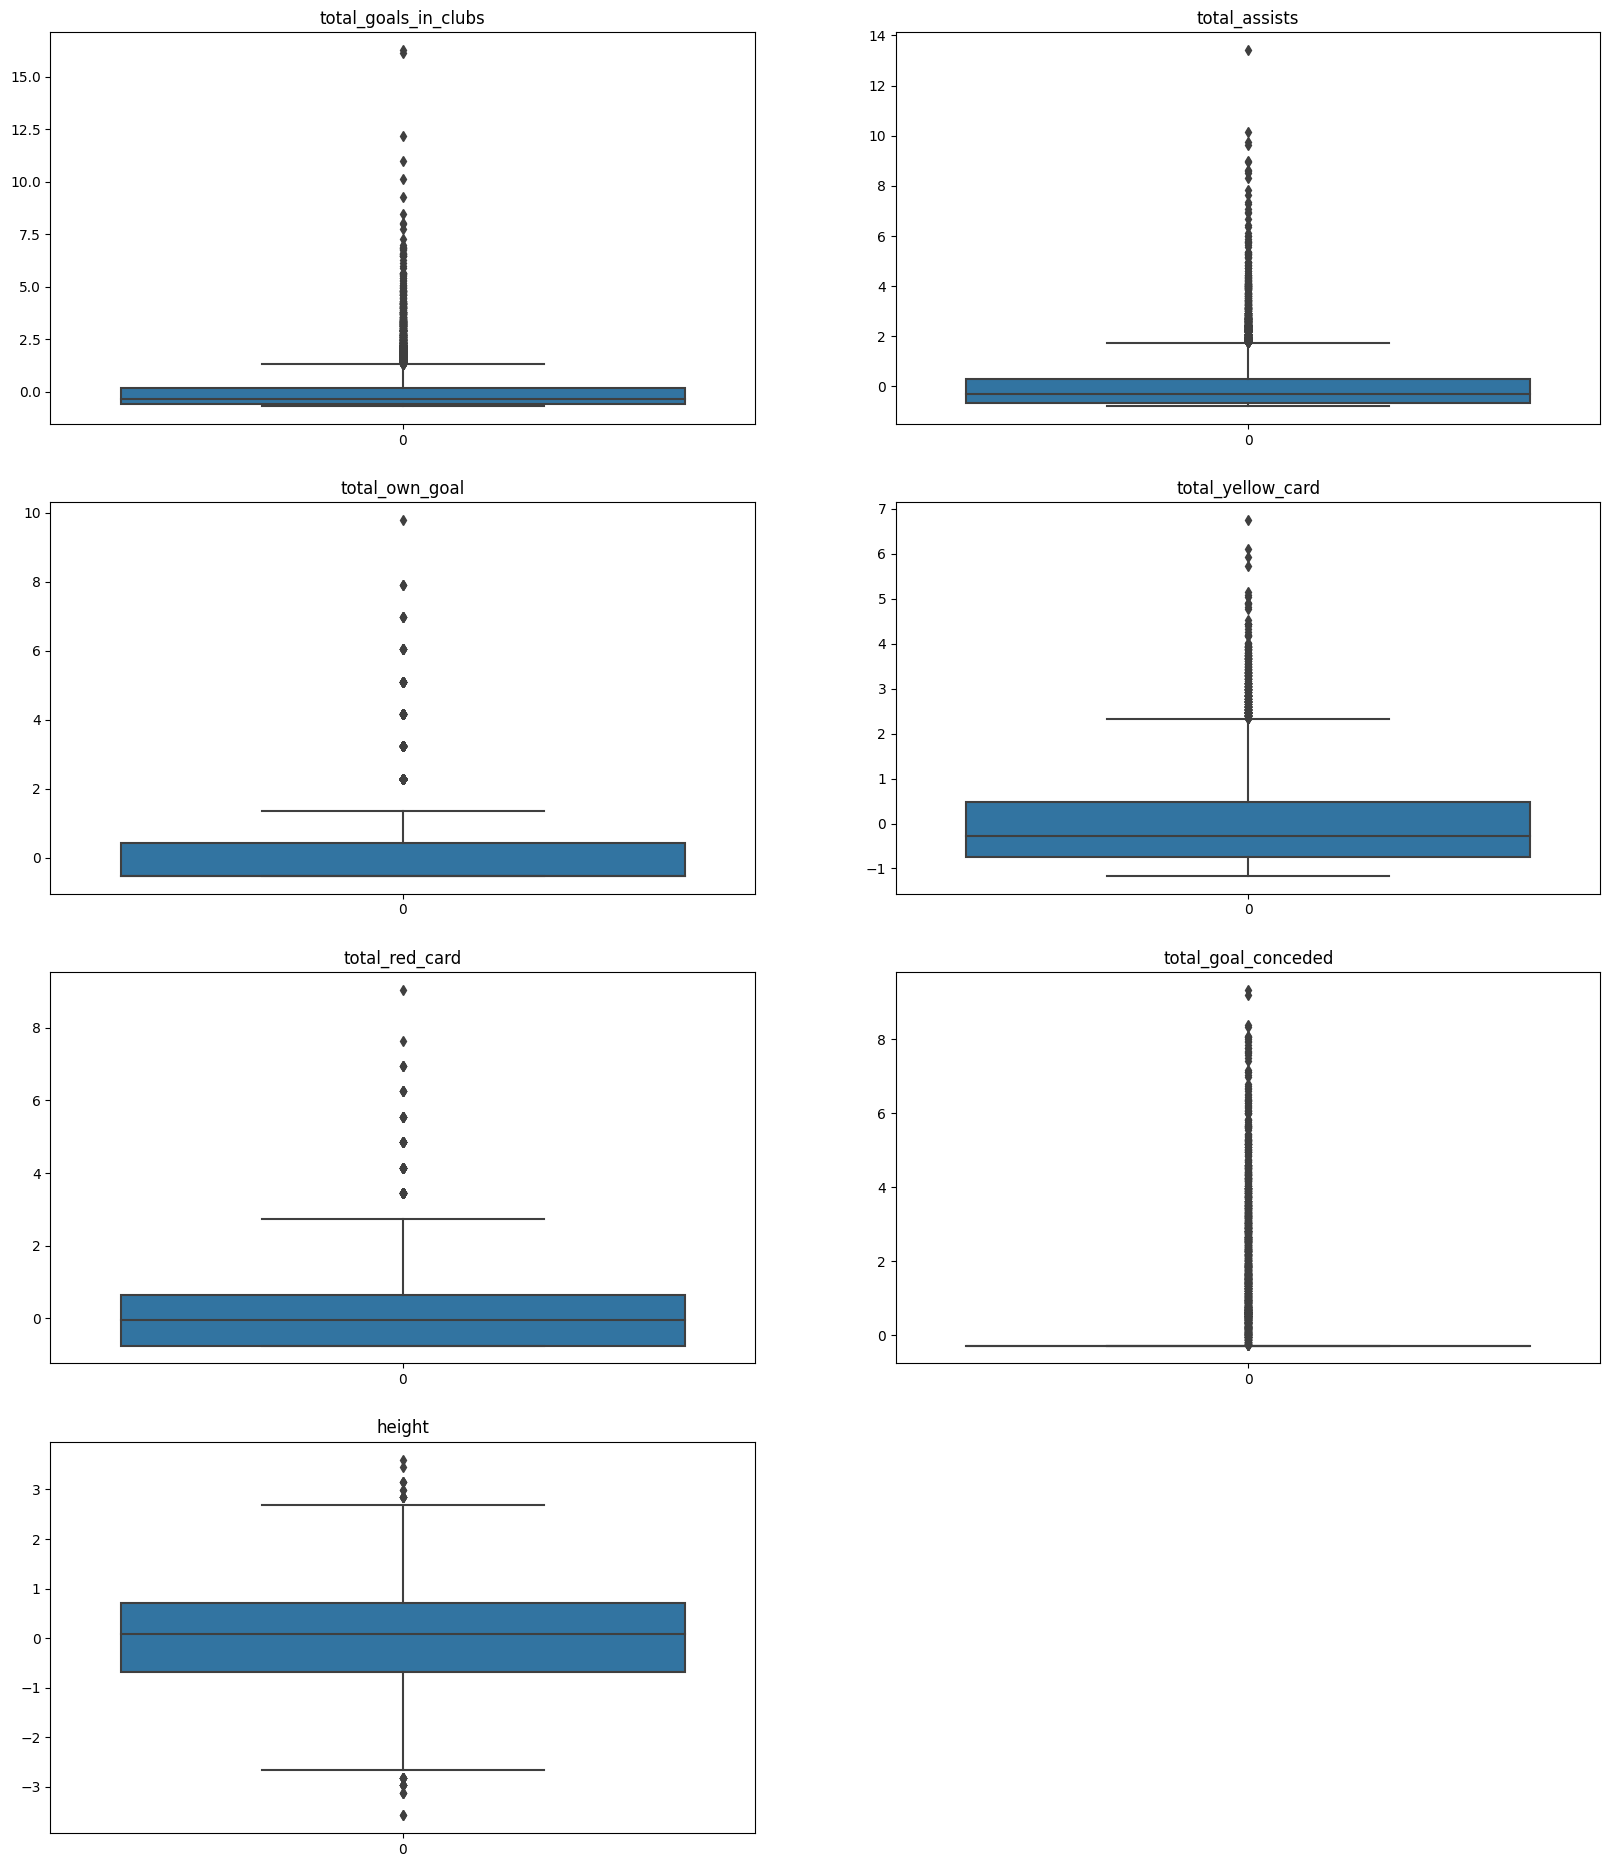

In [18]:
plt.figure(figsize=(20,60))
plt.subplot(10,2,1)
sns.boxplot(dataset_data['total_goals_in_clubs'])
plt.title('total_goals_in_clubs')
plt.subplot(10,2,2)
sns.boxplot(dataset_data['total_assists'])
plt.title('total_assists')
plt.subplot(10,2,3)
sns.boxplot(dataset_data['total_own_goal'])
plt.title('total_own_goal')
plt.subplot(10,2,4)
sns.boxplot(dataset_data['total_yellow_card'])
plt.title('total_yellow_card')
plt.subplot(10,2,5)
sns.boxplot(dataset_data['total_red_card'])
plt.title('total_red_card')
plt.subplot(10,2,6)
sns.boxplot(dataset_data['total_goal_conceded'])
plt.title('total_goal_conceded')
plt.subplot(10,2,7)
sns.boxplot(dataset_data['height'])
plt.title('height')

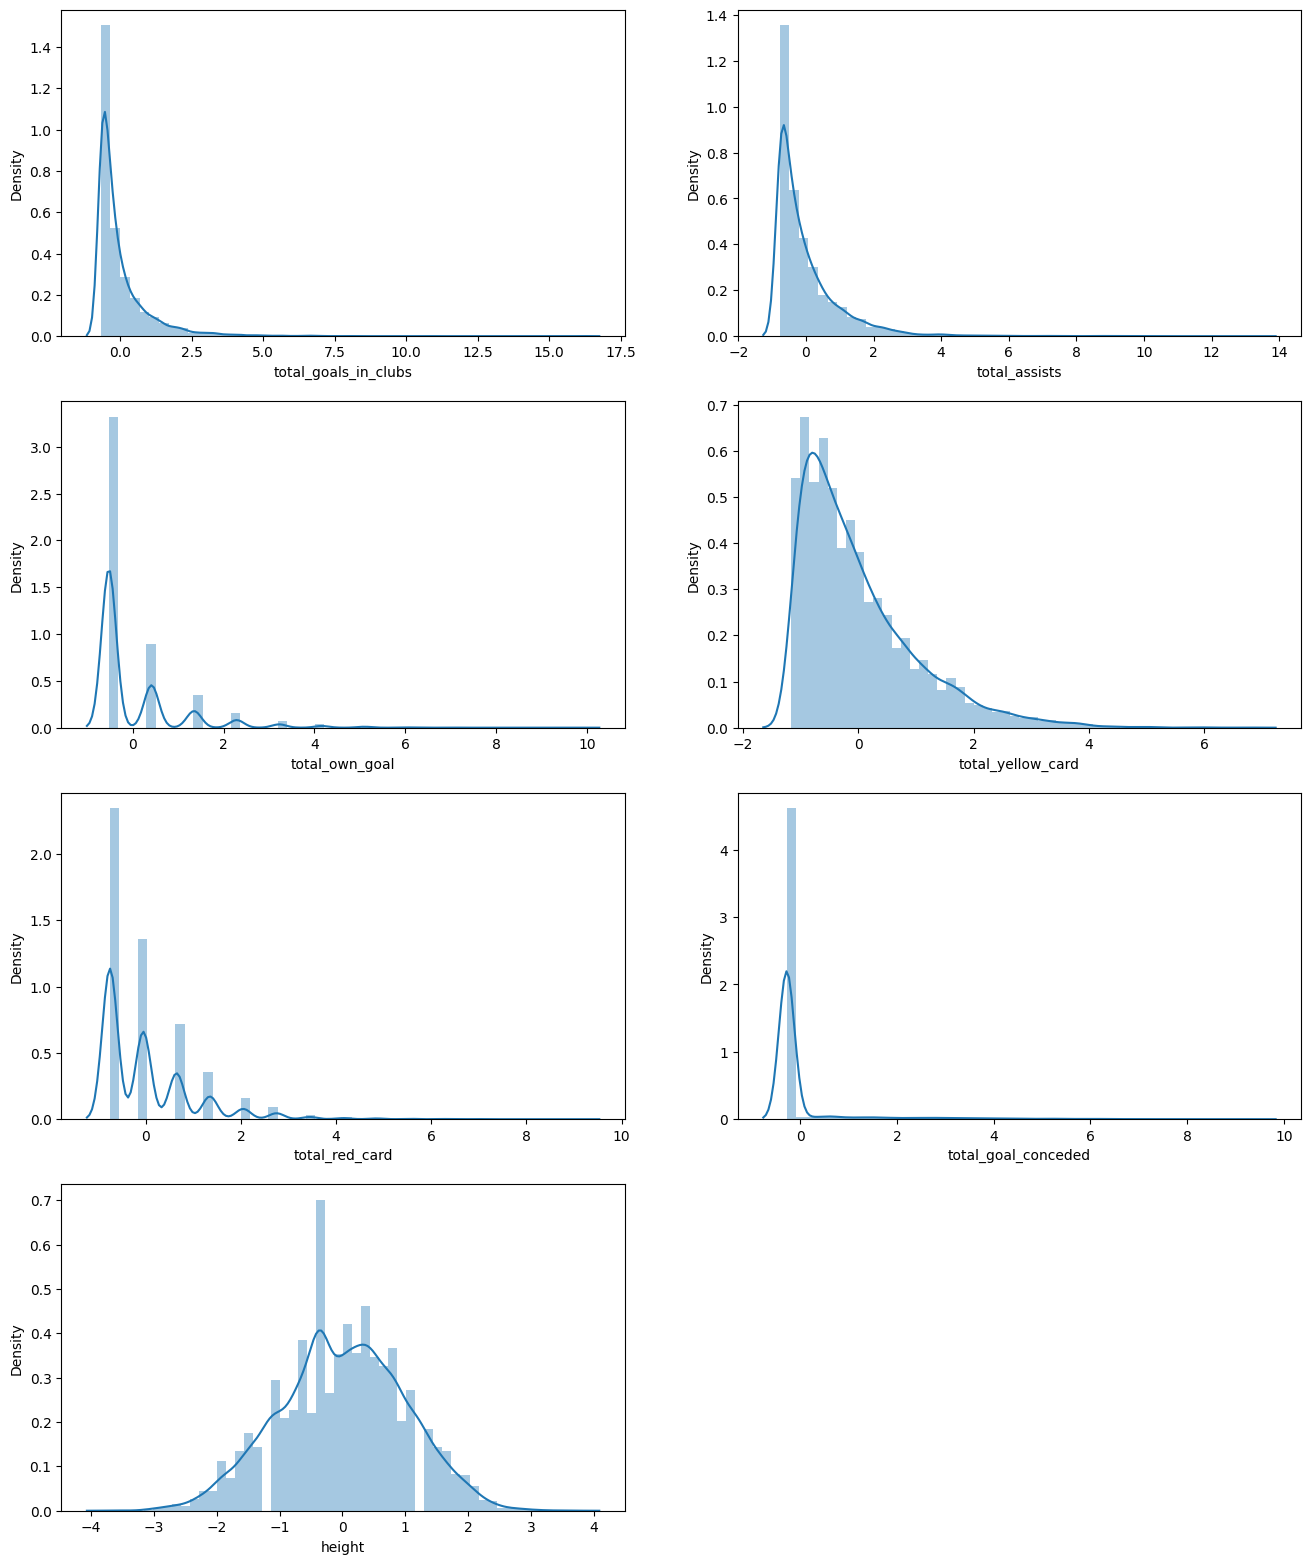

In [19]:
# Index(['total_goals_in_clubs', 'total_assists', 'total_own_goal',
#        'total_yellow_card', 'total_red_card', 'total_goal_conceded', 'height',
#        'ATT', 'DEF', 'GK', 'MID'],
#       dtype='object')
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,50))
plt.subplot(10,2,1)
sns.distplot(dataset_data['total_goals_in_clubs'])
plt.subplot(10,2,2)
sns.distplot(dataset_data['total_assists'])
plt.subplot(10,2,3)
sns.distplot(dataset_data['total_own_goal'])
plt.subplot(10,2,4)
sns.distplot(dataset_data['total_yellow_card'])
plt.subplot(10,2,5)
sns.distplot(dataset_data['total_red_card'])
plt.subplot(10,2,6)
sns.distplot(dataset_data['total_goal_conceded'])
plt.subplot(10,2,7)
sns.distplot(dataset_data['height'])
plt.show()

In [20]:
need_outlier_management = ['total_goals_in_clubs','total_assists','total_yellow_card']
for item in need_outlier_management:
    q1 = dataset_data[item].quantile(0.25)
    q3 = dataset_data[item].quantile(0.75)
    iqr = q3 - q1


    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    # replace outliers with the median value
    median = dataset_data[item].median()
    dataset_data[item] = np.where((dataset_data[item] < lower_bound), median, dataset_data[item])
    dataset_data[item] = np.where((dataset_data[item] > upper_bound), median, dataset_data[item])

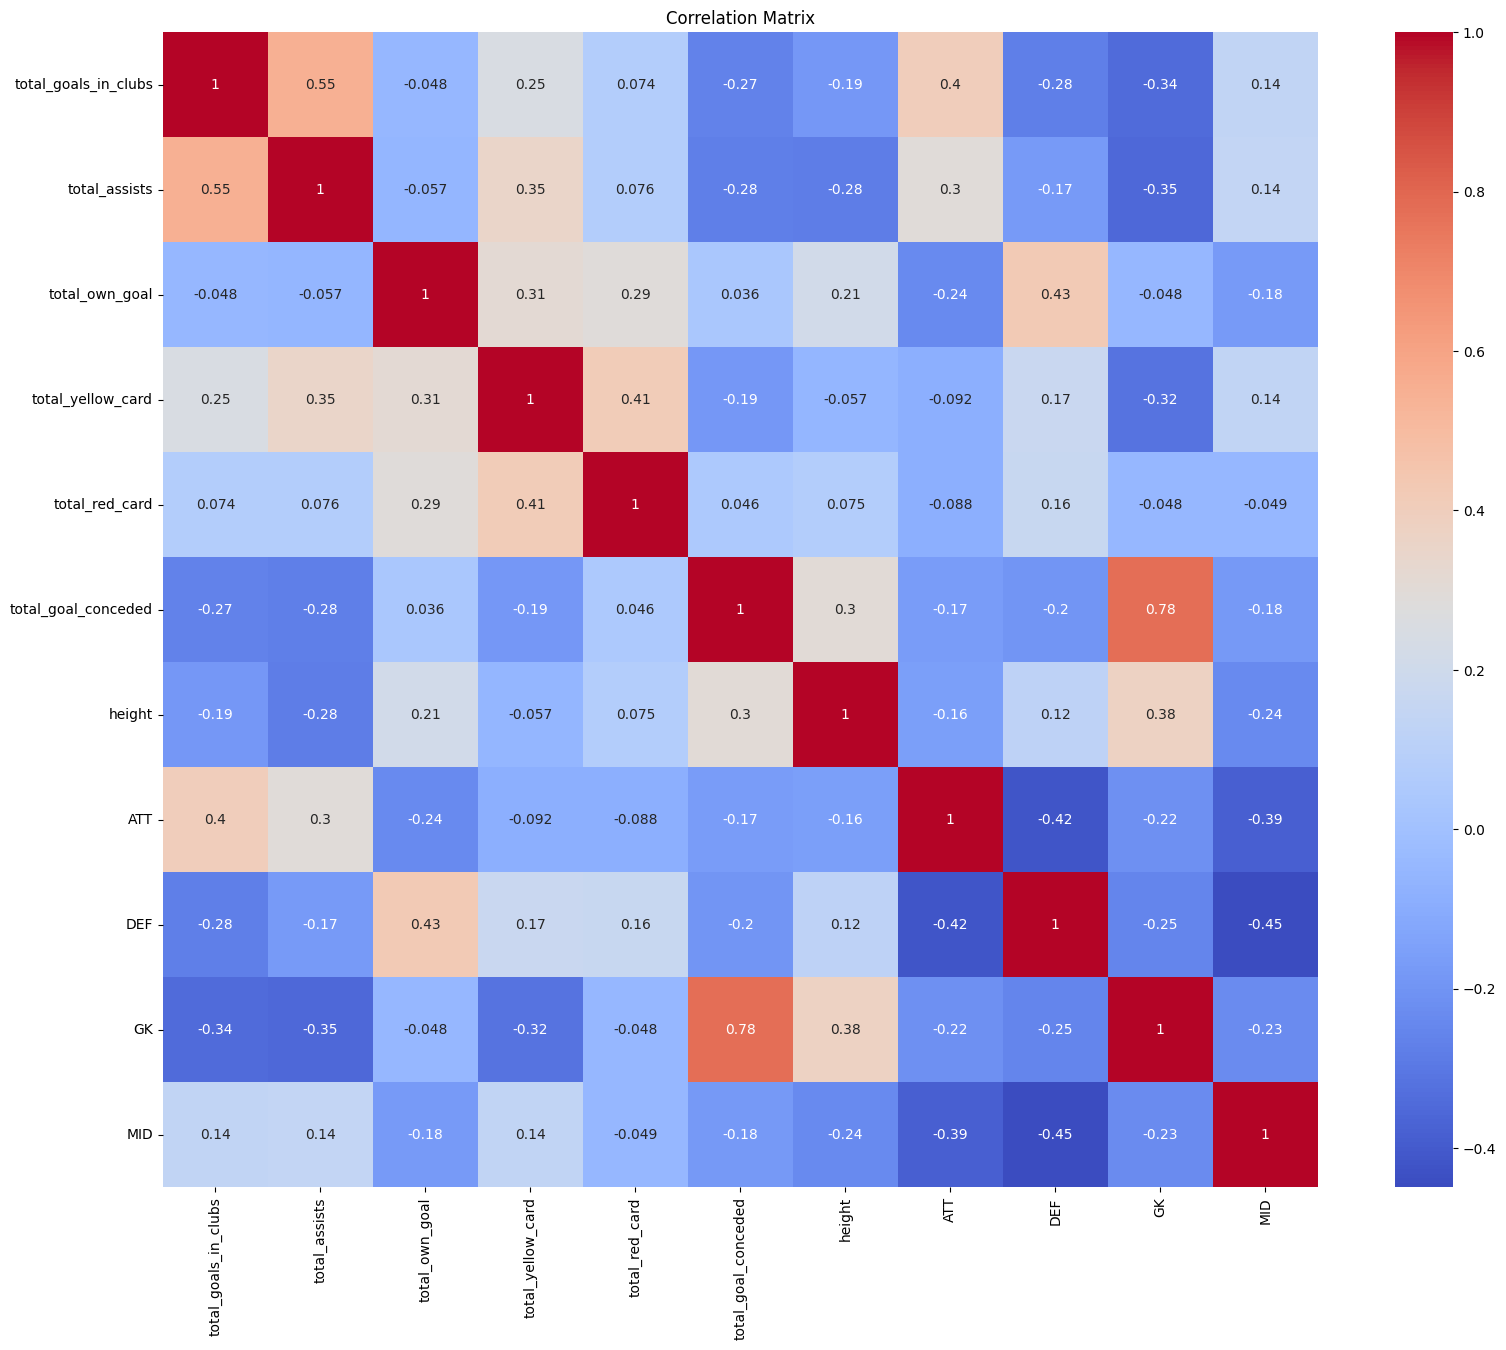

In [21]:
correlation_matrix = dataset_data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Text(0.5, 1.0, 'height')

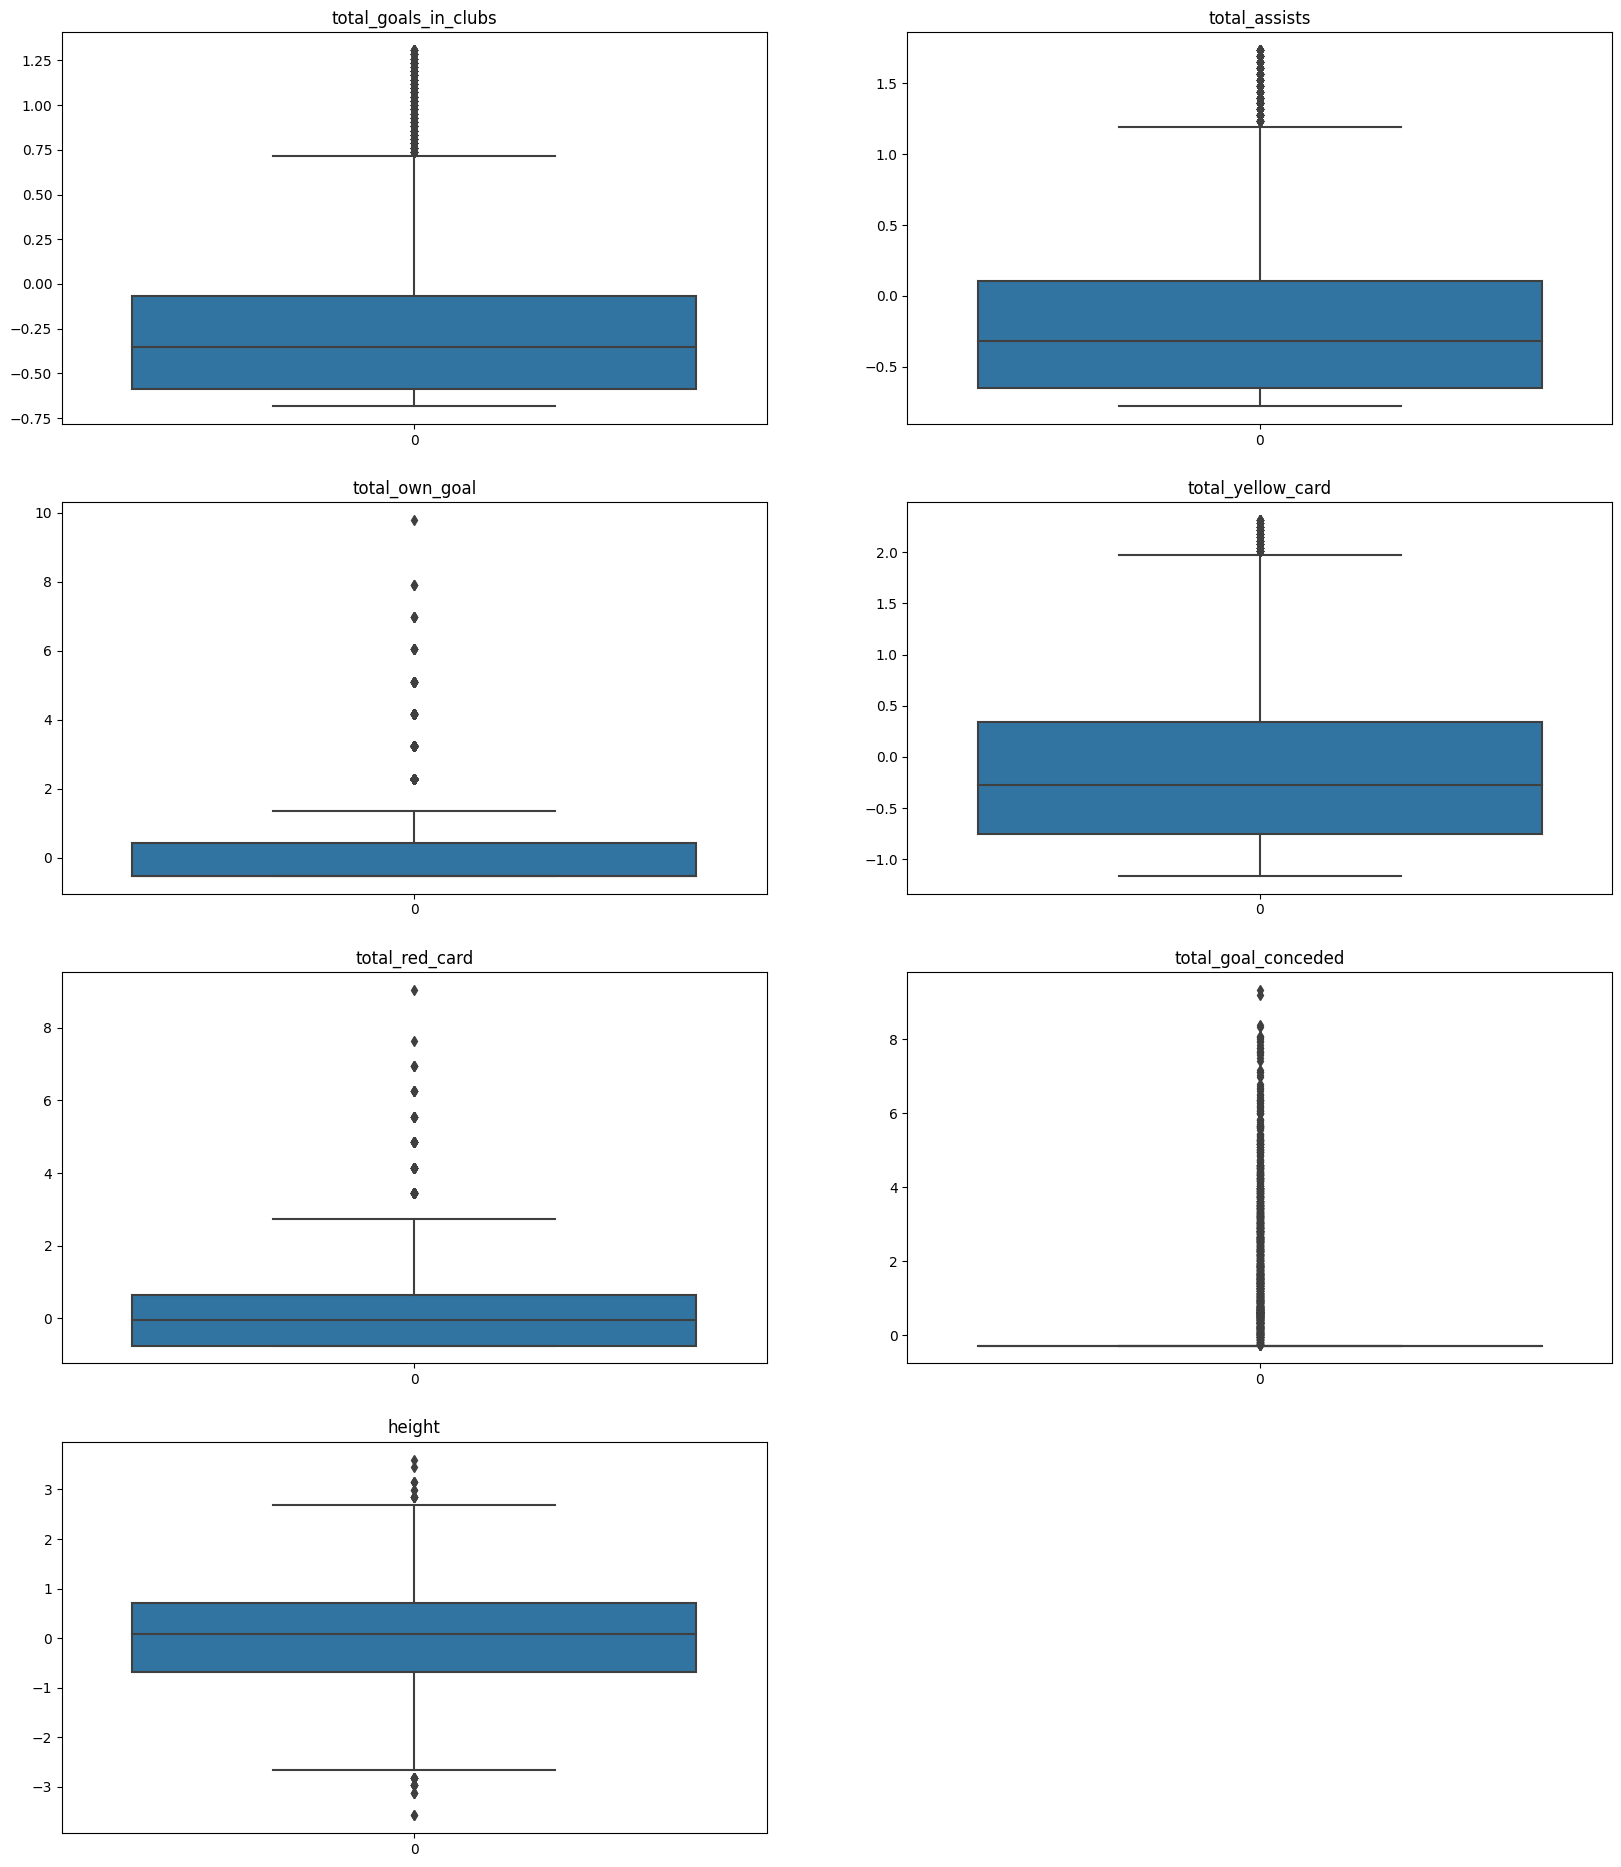

In [22]:
plt.figure(figsize=(20,60))
plt.subplot(10,2,1)
sns.boxplot(dataset_data['total_goals_in_clubs'])
plt.title('total_goals_in_clubs')
plt.subplot(10,2,2)
sns.boxplot(dataset_data['total_assists'])
plt.title('total_assists')
plt.subplot(10,2,3)
sns.boxplot(dataset_data['total_own_goal'])
plt.title('total_own_goal')
plt.subplot(10,2,4)
sns.boxplot(dataset_data['total_yellow_card'])
plt.title('total_yellow_card')
plt.subplot(10,2,5)
sns.boxplot(dataset_data['total_red_card'])
plt.title('total_red_card')
plt.subplot(10,2,6)
sns.boxplot(dataset_data['total_goal_conceded'])
plt.title('total_goal_conceded')
plt.subplot(10,2,7)
sns.boxplot(dataset_data['height'])
plt.title('height')

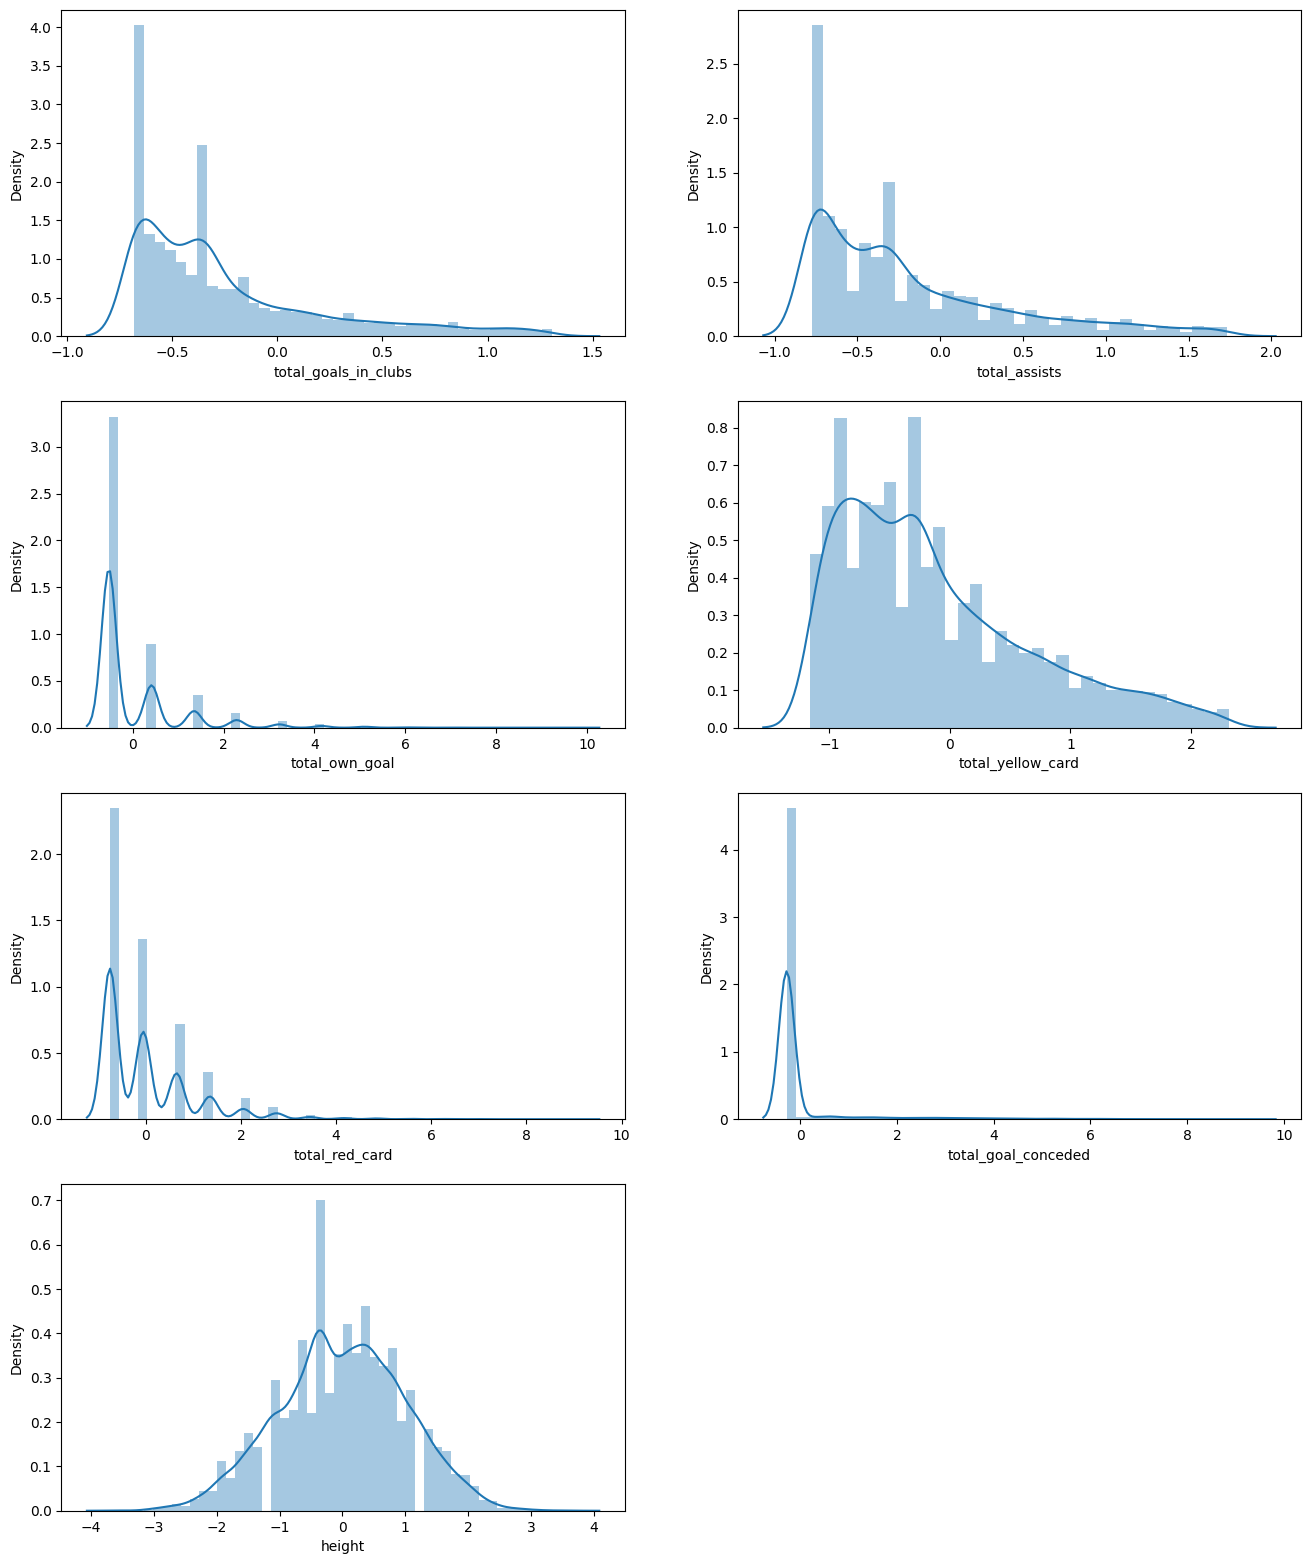

In [23]:
# Index(['total_goals_in_clubs', 'total_assists', 'total_own_goal',
#        'total_yellow_card', 'total_red_card', 'total_goal_conceded', 'height',
#        'ATT', 'DEF', 'GK', 'MID'],
#       dtype='object')
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,50))
plt.subplot(10,2,1)
sns.distplot(dataset_data['total_goals_in_clubs'])
plt.subplot(10,2,2)
sns.distplot(dataset_data['total_assists'])
plt.subplot(10,2,3)
sns.distplot(dataset_data['total_own_goal'])
plt.subplot(10,2,4)
sns.distplot(dataset_data['total_yellow_card'])
plt.subplot(10,2,5)
sns.distplot(dataset_data['total_red_card'])
plt.subplot(10,2,6)
sns.distplot(dataset_data['total_goal_conceded'])
plt.subplot(10,2,7)
sns.distplot(dataset_data['height'])
plt.show()

In [24]:
from sklearn.cluster import KMeans
cost = []

for i in range(1,21):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0, n_init=5)
    kmeans.fit(dataset_data)
    cost.append(kmeans.inertia_)

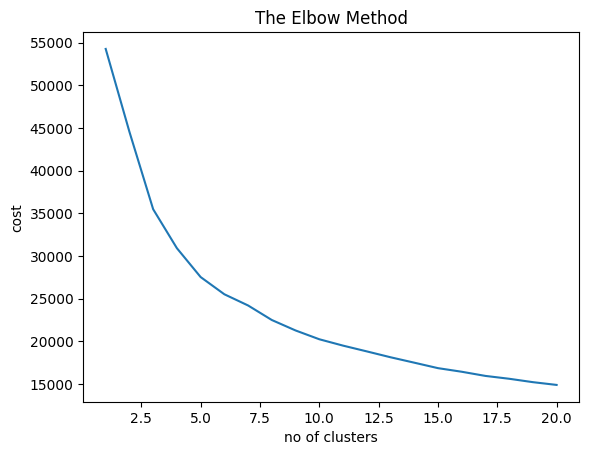

In [25]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,21), cost)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('cost')
plt.show()

In [26]:
kmeans_cluster = KMeans(n_clusters= 5, init='k-means++', random_state=0)
kmeans_cluster_pred = kmeans_cluster.fit_predict(dataset_data)

In [27]:
ser = pd.Series(kmeans_cluster_pred)

In [28]:
for i in range(4):
    ser[ser == i].info()
    print("################")

<class 'pandas.core.series.Series'>
Index: 1633 entries, 593 to 9140
Series name: None
Non-Null Count  Dtype
--------------  -----
1633 non-null   int32
dtypes: int32(1)
memory usage: 19.1 KB
################
<class 'pandas.core.series.Series'>
Index: 573 entries, 1216 to 9139
Series name: None
Non-Null Count  Dtype
--------------  -----
573 non-null    int32
dtypes: int32(1)
memory usage: 6.7 KB
################
<class 'pandas.core.series.Series'>
Index: 3209 entries, 0 to 9137
Series name: None
Non-Null Count  Dtype
--------------  -----
3209 non-null   int32
dtypes: int32(1)
memory usage: 37.6 KB
################
<class 'pandas.core.series.Series'>
Index: 2811 entries, 1 to 9136
Series name: None
Non-Null Count  Dtype
--------------  -----
2811 non-null   int32
dtypes: int32(1)
memory usage: 32.9 KB
################


In [29]:
for item in ['ATT','DEF','GK','MID']:
    print(item , ' : ' , len(dataset_data[dataset_data[item] == 1]))

ATT  :  2417
DEF  :  3000
GK  :  1055
MID  :  2669


In [30]:
kmeans_cluster.cluster_centers_

array([[-6.25545596e-02,  1.62496053e-01, -1.35881801e-01,
         7.69960653e-01,  1.15722840e+00, -2.80467978e-01,
        -6.23446548e-02,  2.72337821e-01,  3.12729498e-01,
         6.11995104e-04,  4.14320685e-01],
       [-6.79716075e-01, -7.77196817e-01,  1.08911486e-01,
        -6.42248978e-01,  2.00137700e-01,  3.44272596e+00,
         1.11381033e+00, -3.33066907e-16, -1.11022302e-16,
         1.00000000e+00,  2.22044605e-16],
       [-1.16931701e-01,  4.89102057e-03, -3.91505680e-01,
        -3.03588361e-01, -4.44022064e-01, -2.81199320e-01,
        -8.99117324e-01,  4.03870162e-01,  1.63857678e-01,
         3.12109863e-04,  4.31960050e-01],
       [-3.88684851e-01, -4.55746513e-01, -2.63559215e-01,
        -5.50017511e-01, -4.49423321e-01, -1.26921175e-01,
         6.62155362e-01,  2.33392540e-01,  4.04262877e-01,
         1.70159858e-01,  1.92184725e-01],
       [-2.71032332e-01, -2.75108343e-01,  2.35620543e+00,
         5.96231431e-01,  7.45555455e-01, -2.79947068e-01,
  

In [31]:
kmeans_cluster_pred

array([2, 3, 3, ..., 1, 1, 0], dtype=int32)

In [32]:
dataset

,total_goals_in_clubs,total_assists,total_own_goal,total_yellow_card,total_second_yellow_card,total_red_card,total_penalty,total_goal_conceded,total_clean_sheets,height,pos
0,5,5,0,3,0,0,3,0,0,173,MID
1,0,1,0,0,0,1,0,0,0,184,DEF
2,0,1,0,4,1,0,0,0,0,187,DEF
3,2,1,0,0,0,0,0,0,0,180,MID
4,17,2,0,2,0,0,0,0,0,182,ATT
...,...,...,...,...,...,...,...,...,...,...,...
9136,204,56,0,29,0,0,1,0,0,193,ATT
9137,65,81,0,66,3,0,4,0,0,179,MID
9138,0,0,0,7,0,1,0,411,94,194,GK
9139,0,0,2,37,0,4,0,642,174,190,GK


In [33]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.losses import kullback_leibler_divergence
from sklearn.cluster import KMeans
import numpy as np

def target_distribution(q):
    weight = q ** 2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

X = dataset_data.copy()

input_layer = Input(shape=(11,))
encoded = Dense(10, activation='relu')(input_layer)
decoded = Dense(11, activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X, X, epochs=50, batch_size=32)

encoder = Model(input_layer, encoded)
X_encoded = encoder.predict(X)

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_encoded)
cluster_centers = kmeans.cluster_centers_

clustering_layer = Dense(n_clusters, activation='softmax')(encoded)
model = Model(input_layer, clustering_layer)

model.compile(optimizer=Adam(lr=0.01), loss=kullback_leibler_divergence)

model.fit(X, kmeans.labels_, epochs=50, batch_size=32)


for i in range(5):
    q = model.predict(X, verbose=0)
    p = target_distribution(q)  # update the auxiliary target distribution
    model.fit(X, p, epochs=1, batch_size=32)
    
cluster_assignments = model.predict(X).argmax(1)
print(cluster_assignments)

2023-05-30 23:03:59.726593: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-30 23:04:03.219667: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-30 23:04:03.233332: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 23:04:09.727953: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-30 23:04:14.423384: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Do

Epoch 1/50
286/286 [==============================] - 3s 868us/step - loss: 0.6003
Epoch 2/50
286/286 [==============================] - 0s 834us/step - loss: 0.4250
Epoch 3/50
286/286 [==============================] - 0s 727us/step - loss: 0.3611
Epoch 4/50
286/286 [==============================] - 0s 745us/step - loss: 0.3336
Epoch 5/50
286/286 [==============================] - 0s 713us/step - loss: 0.3181
Epoch 6/50
286/286 [==============================] - 0s 741us/step - loss: 0.3079
Epoch 7/50
286/286 [==============================] - 0s 715us/step - loss: 0.3005
Epoch 8/50
286/286 [==============================] - 0s 739us/step - loss: 0.2947
Epoch 9/50
286/286 [==============================] - 0s 747us/step - loss: 0.2902
Epoch 10/50
286/286 [==============================] - 0s 730us/step - loss: 0.2867
Epoch 11/50
286/286 [==============================] - 0s 785us/step - loss: 0.2840
Epoch 12/50
286/286 [==============================] - 0s 714us/step - loss: 0.2819
E

286/286 [==============================] - 0s 799us/step - loss: 4.3306
Epoch 49/50
286/286 [==============================] - 0s 834us/step - loss: 4.3305
Epoch 50/50
286/286 [==============================] - 0s 523us/step
[0 2 2 ... 1 1 4]
